# UTS



### Import libraries

pertama yang harus di lakukan adalah mengimport library

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the `train_test_split` method. To scale the features, I am using `StandardScaler`.

### Import dataset

import dataset

In [15]:
dataset = pd.read_csv('dataset.csv')

In [16]:
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

selanjutnya yang di lakukan adalah untuk mengecek misssing value apabilah ada missing value akan di gunakan KNN untuk mencari data yang hilang tersebut

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


total data ada 303 tanpa ada missing value

In [18]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


lalu cek ukuran datanya

In [19]:
dataset.shape


(303, 14)

ini adalah heatmap menggunakan seaborn untuk mengetahui hubungan antar fitur

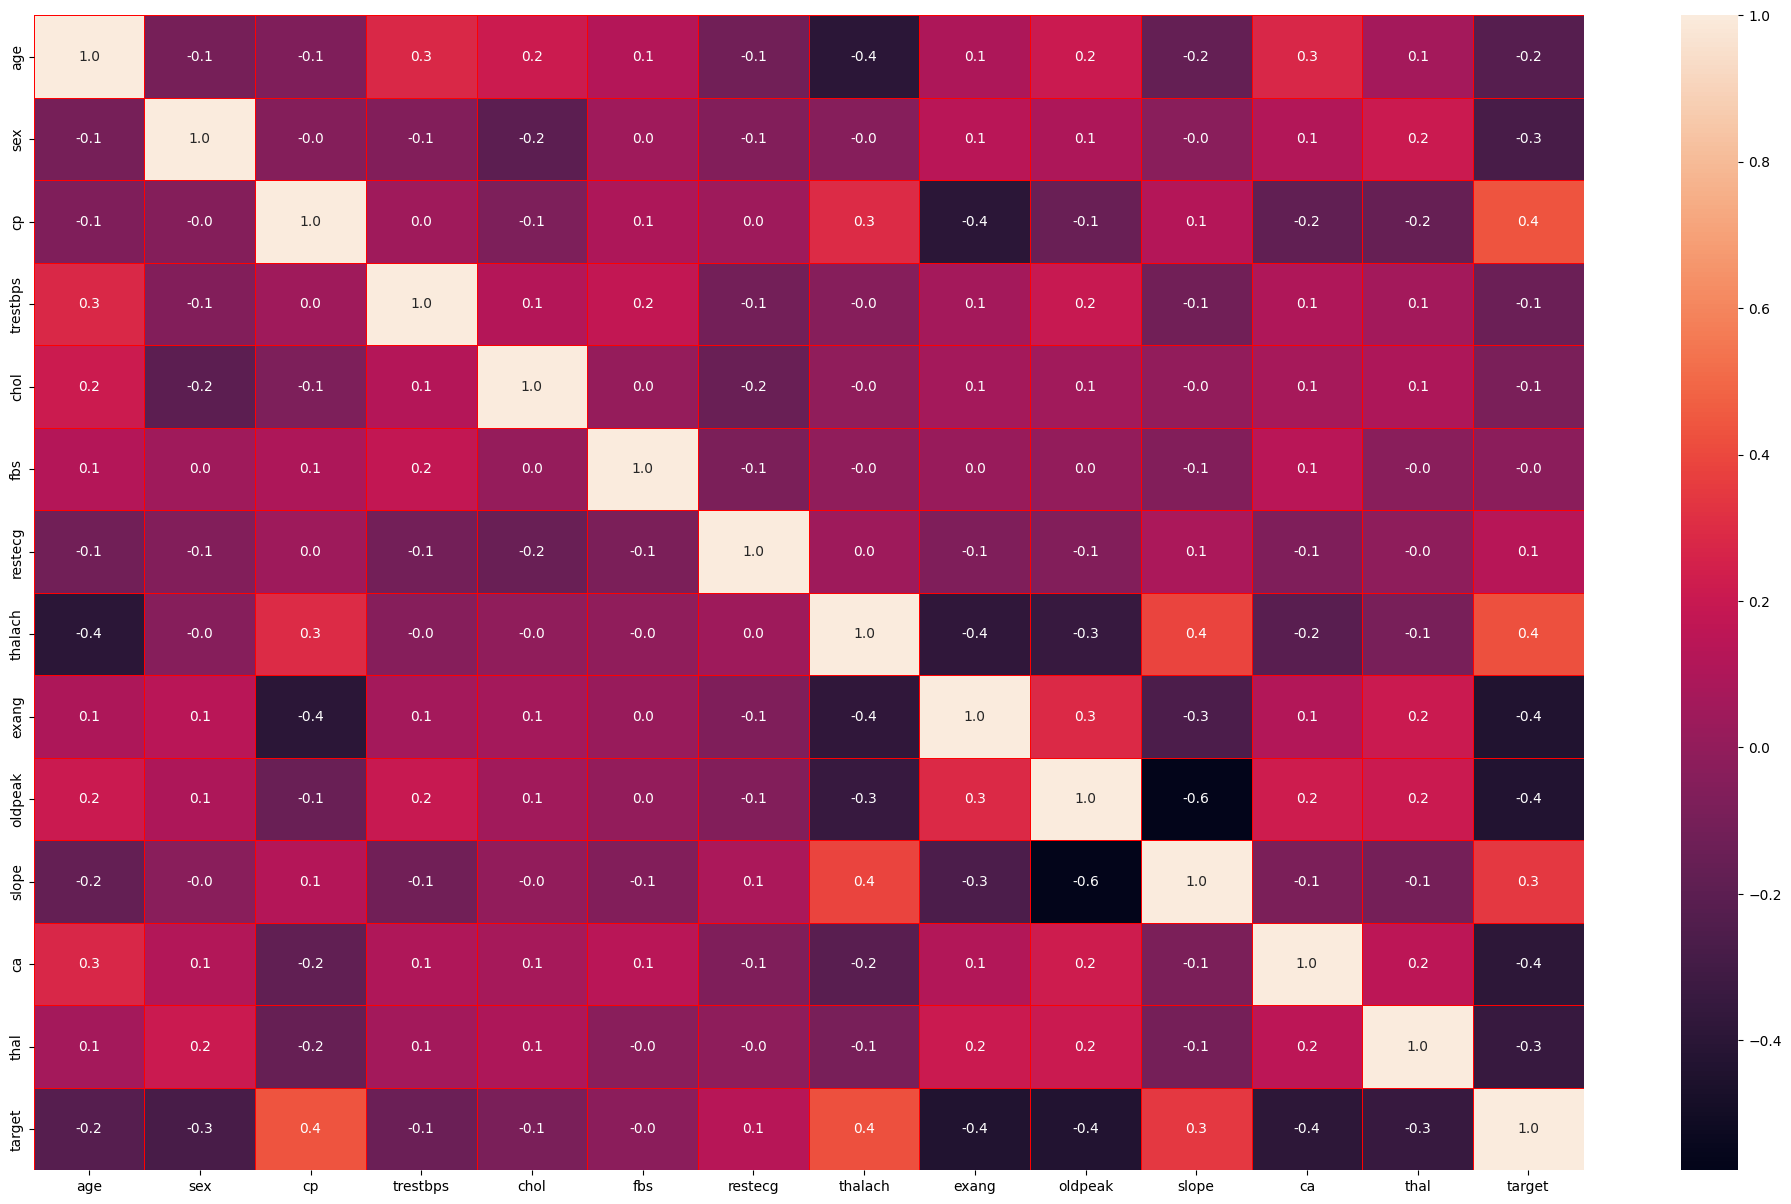

In [21]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [ ]:
lalu kita pisahkan antara fiture dan label

In [23]:
X=dataset.iloc[:, 0:13]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
dan ini adalah labelnya yang telah di pisahkan

In [24]:
y=dataset.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
lalu selanjutnya melakukan standarisasi data

$$z=\frac{x-\mu}{\sigma}$$

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)


[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [ ]:
membagi data menjadi data latih dan data uji

In [32]:
from sklearn.model_selection import train_test_split
bagi = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(bagi)

[array([[-1.36386876,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.40075247,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887,  1.12302895],
       [-0.92271345,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       ...,
       [ 1.61392956,  0.68100522,  1.97312292, ..., -0.64911323,
         0.26508221, -0.51292188],
       [-0.92271345,  0.68100522, -0.93851463, ...,  0.97635214,
        -0.71442887,  1.12302895],
       [ 0.9521966 , -1.46841752,  0.03203122, ...,  0.97635214,
         1.24459328, -0.51292188]]), array([[ 0.29046364,  0.68100522, -0.93851463,  1.04952029,  0.57466203,
        -0.41763453, -1.00583187, -1.6463164 ,  1.43548113, -0.37924438,
        -0.64911323,  0.26508221, -2.14887271],
       [ 0.5110413 ,  0.68100522,  1.97312292,  2.19177836,  0.80656782,
        -0.41763453, -1.00583187,  0.40901733, -0.69663055, -0.7243226 ,
        -0.64911323, -0.71442887,  1.12302895

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


di atas adalah hasil prediksi dari data uji yang telah di latih

lalu yang harus kita lakukan adalah mengecek akurasinya

In [35]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8688524590163934
